In [1]:
# Importar Librerias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalización a las imágenes de entrenamiento
    rotation_range=15,    # Rota 15 grados aleatoriamente 
    zoom_range=0.1,       # Les aplica un Zoom de un 10%
    horizontal_flip=True  # Las Voltea horizontalmente
)

test_datagen = ImageDataGenerator(rescale=1./255) # Normalización a las imágenes de prueba

# Cargar imágenes para el entrenamiento
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),  # Redimensionar imágenes
    batch_size=32, 
    class_mode='binary'
)

# Cargar imágenes para las pruebas
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary' # Clasificación binaria: 0 o 1
)


Found 2824 images belonging to 2 classes.
Found 706 images belonging to 2 classes.


In [3]:
# Creación del modelo
model = Sequential([
    # Primera capa convolucional con 32 filtros de 3x3 pixels, activa rectified linear unit y de tamaño de entrada (128x128 RGB)
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  
    MaxPooling2D(2, 2), # Primer capa de reduccion a la mitad el tamaño de la imagen

    Conv2D(64, (3, 3), activation='relu'), # Segunda capa convolucional con 64 filtros
    MaxPooling2D(2, 2), # Segunda capa de reduccion a la mitad

    Conv2D(128, (3, 3), activation='relu'),  # Tercera capa convolucional con 128 filtros
    MaxPooling2D(2, 2), # Tercera capa de reduccion a la mitad

    Flatten(), # Aplana de dos dimensiones a un vector (1D)
    Dropout(0.5), # desactiva un 50% de las neuronas
    Dense(64, activation='relu'), # Capa densa con 64 neuronas
    Dense(1, activation='sigmoid')  # 0 = calle limpia, 1 = calle sucia
])


In [4]:
# Compilacion del modelo
model.compile(
    optimizer='adam', # optimizador clasico
    loss='binary_crossentropy', # función de pérdida adecuada para clasificación binaria
    metrics=['accuracy'] # precision del modelo
)


In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback para detener el entrenamiento si no hay mejoras
early_stop = EarlyStopping(
    monitor='val_loss', # Observa la pérdida en la validación
    patience=3, # Número de épocas sin mejora tras las cuales se detiene el entrenamiento
    restore_best_weights=True # Restaurar los pesos del modelo a la época con el mejor valor de val_loss
)

# Entrenamietno del modelo
history = model.fit(
    train_generator, # Datos de entrenamiento
    epochs=20, # Epocas
    validation_data=test_generator, # Datos de validacion
    callbacks=[early_stop]
)


Epoch 1/20
89/89 [==============================] - 75s 833ms/step - loss: 0.6074 - accuracy: 0.6682 - val_loss: 0.4607 - val_accuracy: 0.8031
Epoch 2/20
89/89 [==============================] - 70s 783ms/step - loss: 0.4861 - accuracy: 0.7659 - val_loss: 0.4224 - val_accuracy: 0.8088
Epoch 3/20
89/89 [==============================] - 65s 732ms/step - loss: 0.4140 - accuracy: 0.8148 - val_loss: 0.5079 - val_accuracy: 0.7833
Epoch 4/20
89/89 [==============================] - 66s 745ms/step - loss: 0.3696 - accuracy: 0.8445 - val_loss: 0.3471 - val_accuracy: 0.8470
Epoch 5/20
89/89 [==============================] - 64s 716ms/step - loss: 0.3391 - accuracy: 0.8548 - val_loss: 0.3567 - val_accuracy: 0.8399
Epoch 6/20
89/89 [==============================] - 64s 712ms/step - loss: 0.2979 - accuracy: 0.8708 - val_loss: 0.3222 - val_accuracy: 0.8640
Epoch 7/20
89/89 [==============================] - 63s 710ms/step - loss: 0.2787 - accuracy: 0.8839 - val_loss: 0.4264 - val_accuracy: 0.8229

In [6]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

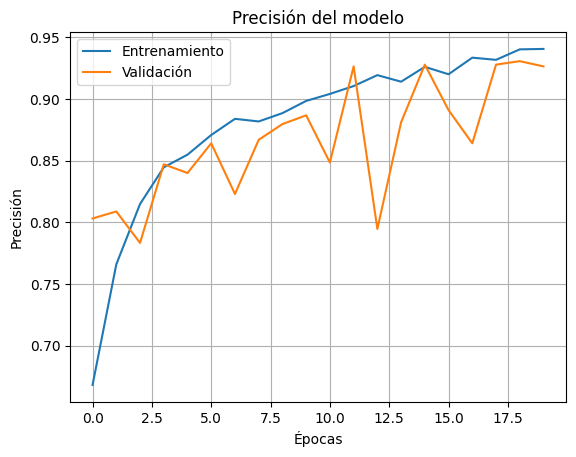

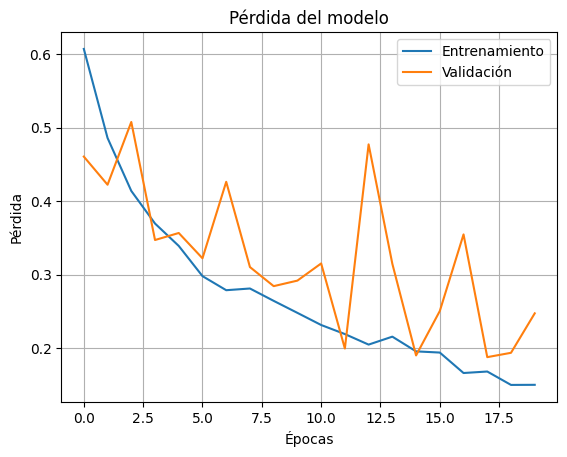

In [7]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Precisión del modelo")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Pérdida del modelo")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100
print(f"Precisión final de entrenamiento: {acc:.2f}%")
print(f"Precisión final de validación:    {val_acc:.2f}%")

Precisión final de entrenamiento: 94.05%
Precisión final de validación:    92.63%


In [9]:
model.save("modelo-final.h5")